In [1]:
import pipeline
import model_loader
from PIL import Image
from transformers import CLIPTokenizer
import torch

DEVICE = "cpu"
ALLOW_CUDA = False
ALLOW_MPS = False

if torch.cuda.is_available()  and ALLOW_CUDA : 
    DEVICE = "cuda"
#elif (torch.has_mps or torch.backend.mps.is_available()) and ALLOW_MPS : 
#    DEVICE = "mps"
    
print(f"Using {DEVICE}")


Using cpu


In [2]:
tokenizer = CLIPTokenizer('../data/vocab.json' , merges_file="../data/merges.txt") 
model_file = "../data/v1-5-pruned-emaonly.ckpt"
models = model_loader.preload_models_weights(model_file,device=DEVICE)


100%|██████████| 45/45 [08:05<00:00, 10.79s/it]


(1, 512, 512, 3)


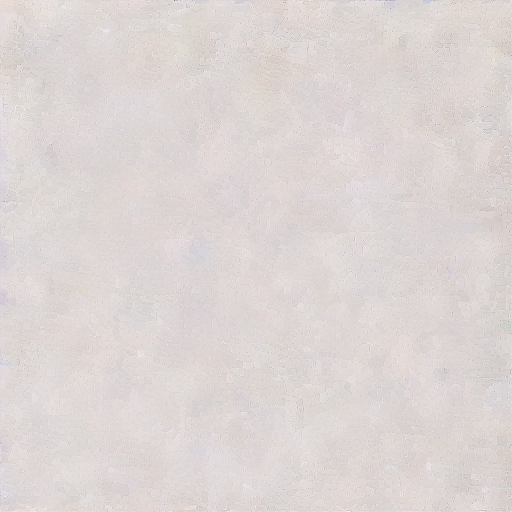

In [5]:
### text to image ###
prompt = "add to the original image A dog with sunglasses, wearing comfy hat, looking at camera, highly detailed, ultra sharp, cinematic, 100mm lens, 8k resolution."
uncond_prompt = ""
do_cfg = True
cfg_scale = 8

input_image = None
### Image to image ###
image_path = '../images/dhia.jpg'
input_image = Image.open(image_path)
strength = 0.9

## Sampler

sampler = "ddpm"
num_inference_steps = 50
seed = 42
output_image = pipeline.generate(
    prompt = prompt,
    uncond_prompt = uncond_prompt,
    input_image = input_image,
    strength = strength,
    do_cfg = do_cfg,
    cfg_scale = cfg_scale,
    sampler_name = sampler,
    n_inference_steps = num_inference_steps,
    seed = seed,
    models = models,
    device = DEVICE,
    idle_device = "cpu",
    tokenizer = tokenizer,
)

Image.fromarray(output_image)



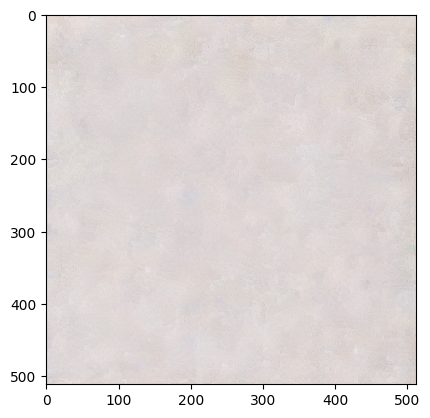

In [6]:
import matplotlib.pyplot as plt

plt.imshow(output_image)